IMPORTING THE LIBRARIES

In [18]:
!pip install textblob


In [26]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from random import randint

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

LIST OF MESSAGES TO DISPLAY, BASED ON PERSONS OVERALL MOOD

In [3]:
sad_messages = [
    "This too shall pass—brighter days are ahead.",
    "You are stronger than you think.",
    "Every storm runs out of rain.",
    "Your feelings are valid; take it one step at a time.",
    "It's okay to rest—healing takes time.",
    "You’ve made it through tough days before, and you will again.",
    "Even the darkest night will end, and the sun will rise.",
    "You are loved more than you know.",
    "Small progress is still progress.",
    "Be kind to yourself—you’re doing the best you can."]

happy_messages = [
    "Keep shining—your joy is contagious!",
    "Celebrate every little victory!",
    "Your happiness lights up the world around you.",
    "Enjoy every moment—you deserve it!",
    "Smile big, laugh loud, and live fully!",
    "Let your positive energy inspire others.",
    "Happiness looks great on you!",
    "Savor this feeling and spread the joy.",
    "Good vibes are flowing your way!",
    "Keep chasing what makes your heart smile!"]


CREATING THE FUNCTIONS

In [24]:
def sentiment_score(entry):
    score = TextBlob(entry)
    sentiment_score = score.polarity
    return sentiment_score

In [5]:
def classify_mood(score):
    if score > 0.3:
        return 'Happy'
    elif score < -0.3:
        return 'Sad'
    else:
        return 'Neutral'

In [27]:
def display_message(mood):
  num=randint(1,9)
  if mood=='Happy':
    message=happy_messages[num]
    return message
  if mood=='Neutral':
    message=happy_messages[num]
    return message
  else:
    message=sad_messages[num]
    return message


In [ ]:
weekly_journal_log={}
''' choice=input("DO YOU WANT TO ENTER A NEW ENTRY? (Y/N): ")

if choice=='y' or choice=='Y':
  pass
  daily_entry=input("How are we feeling today?")
  entry_dt = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
  weekly_journal_log[entry_dt] = daily_entry '''

In [ ]:
def show_weekly_entries():
  for date, entry in weekly_journal_log.items():
    print(f"{date}: {entry}")

# at the end of the week, user can see weekly entries
'''print("Here are your entries for the week: ")
show_weekly_entries()'''

SAMPLE ANALYSIS

In [9]:
#sample entries for the purpose of analysis
weekly_journal_log = {
    "2025-01-08 09:15:23": "Feeling a bit overwhelmed with tasks, but staying positive. Hoping to manage my time better today.",
    "2025-01-09 10:30:45": "More productive today! Managed to complete most of my to-do list. Feeling accomplished and motivated.",
    "2025-01-10 11:45:12": "Midweek slump is hitting me. Feeling a bit tired but trying to stay focused on my goals.",
    "2025-01-11 09:20:55": "Had a great brainstorming session for MoodFlow! Feeling inspired and creative today.",
    "2025-01-12 08:10:34": "Had a fight with friends, feel terrible. Hoping things get better soon.",
    "2025-01-13 14:25:18": "Relaxed and recharged. Spent time with family and caught up on some reading. Feeling peaceful.",
    "2025-01-14 16:40:07": "Reflecting on the week. Proud of my progress but planning to improve my workflow next week. Feeling balanced."
}

CONVERTNIG DATA TO DATAFRAME

In [11]:
data = pd.DataFrame(weekly_journal_log.items(), columns=['Date', 'Entry'])
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Entry
0,2025-01-08 09:15:23,"Feeling a bit overwhelmed with tasks, but stay..."
1,2025-01-09 10:30:45,More productive today! Managed to complete mos...
2,2025-01-10 11:45:12,Midweek slump is hitting me. Feeling a bit tir...
3,2025-01-11 09:20:55,Had a great brainstorming session for MoodFlow...
4,2025-01-12 08:10:34,"Had a fight with friends, feel terrible. Hopin..."
5,2025-01-13 14:25:18,Relaxed and recharged. Spent time with family ...
6,2025-01-14 16:40:07,Reflecting on the week. Proud of my progress b...


APPLYING THE FUCTIONS TO EACH ENTRY TO KNOW SENTIMENT AND MOOD

In [25]:
data['Sentiment'] = data['Entry'].apply(sentiment_score)
data['Mood'] = data['Sentiment'].apply(classify_mood)
data

,Date,Entry,Sentiment,Mood
0,2025-01-08 09:15:23,"Feeling a bit overwhelmed with tasks, but stay...",0.363636,Happy
1,2025-01-09 10:30:45,More productive today! Managed to complete mos...,0.356250,Happy
2,2025-01-10 11:45:12,Midweek slump is hitting me. Feeling a bit tir...,-0.400000,Sad
3,2025-01-11 09:20:55,Had a great brainstorming session for MoodFlow...,0.750000,Happy
4,2025-01-12 08:10:34,"Had a fight with friends, feel terrible. Hopin...",-0.250000,Neutral
5,2025-01-13 14:25:18,Relaxed and recharged. Spent time with family ...,0.075000,Neutral
6,2025-01-14 16:40:07,Reflecting on the week. Proud of my progress b...,0.400000,Happy


In [45]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['DM'] = data['Date'].dt.strftime('%d-%m')
data = data.drop(['Day', 'Month','Day-Month'], axis=1)
data

,Date,Entry,Sentiment,Mood,DM
0,2025-01-08 09:15:23,"Feeling a bit overwhelmed with tasks, but stay...",0.363636,Happy,08-01
1,2025-01-09 10:30:45,More productive today! Managed to complete mos...,0.356250,Happy,09-01
2,2025-01-10 11:45:12,Midweek slump is hitting me. Feeling a bit tir...,-0.400000,Sad,10-01
3,2025-01-11 09:20:55,Had a great brainstorming session for MoodFlow...,0.750000,Happy,11-01
4,2025-01-12 08:10:34,"Had a fight with friends, feel terrible. Hopin...",-0.250000,Neutral,12-01
5,2025-01-13 14:25:18,Relaxed and recharged. Spent time with family ...,0.075000,Neutral,13-01
6,2025-01-14 16:40:07,Reflecting on the week. Proud of my progress b...,0.400000,Happy,14-01


WEEKLY FEEDBACK BASED ON AVERAGE SENTIMENTS

In [31]:
sent_avg=data.Sentiment.mean()
sent_avg

0.18498376623376625

In [33]:
weekly_mood=classify_mood(sent_avg)
weekly_feedback=display_message(weekly_mood)
weekly_feedback

'Your happiness lights up the world around you.'

VISUALISATION

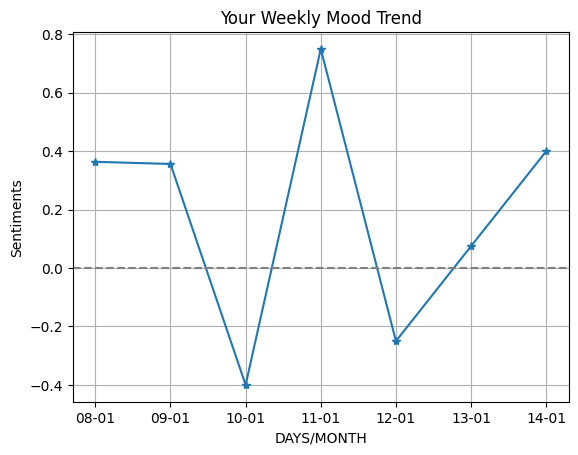

In [47]:
x_ax=data.DM
y_ax=data.Sentiment
plt.plot(x_ax,y_ax,marker='*')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Your Weekly Mood Trend')
plt.xlabel("DAYS/MONTH")
plt.ylabel("Sentiments")
plt.grid(True)
plt.show()